#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [42]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [43]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# **1-Basic Data Exploration:**

In [44]:

# Identify the number of rows and columns
print('Identify the number of rows and columns')
print(df.shape)
print(20*'//')
#Determine the data types of each column
print('Determine the data types of each column')
print(df.dtypes)
print(20*'//')
# Check for missing values in each column
print('Check for missing values in each column')
print(df.isnull().sum())

Identify the number of rows and columns
(148654, 13)
////////////////////////////////////////
Determine the data types of each column
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
////////////////////////////////////////
Check for missing values in each column
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# **2-Descriptive Statistics:**

In [45]:
# Calculate basic statistics(mean, median, mode, minimum, and maximum salary)
basic_stats = df.describe()

# Calculate the range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()

# Find the standard deviation of salaries
salary_std_dev = df['TotalPay'].std()

print("\nBasic Statistics:")
print(basic_stats)
print(f"\nRange of salaries: {salary_range}")
print(f"Standard Deviation of salaries: {salary_std_dev}")



Basic Statistics:
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -

# **3-Data Cleaning:**

OvertimePay, OtherPay, TotalPay, TotalPayBenefits, Year, Agency:

Since the number of missing values is very small (only 1 in each column), one option is to simply drop those rows as they won't significantly impact the overall dataset.

In [46]:
df.dropna(subset=['OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'], inplace=True)


Benefits:

The 'Benefits' column has a substantial number of missing values (36160 out of the total rows). It's important to consider why these values are missing.
One approach could be to fill the missing 'Benefits' values with zeros, assuming that a missing value in this column may indicate that the corresponding employee does not receive any benefits.

Instead of filling missing values with the mean, you can use the median. The median is less sensitive to outliers and may be a better choice if your data has extreme values

In [47]:
#Instead of filling missing values with the mean, you can use the median. The median is less sensitive to outliers and may be a better choice if your data has extreme values
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)


Notes, Status:

Both 'Notes' and 'Status' columns have a high number of missing values (49730 out of the total rows).
If these columns are not crucial for your analysis, you might consider dropping them altogether.

In [48]:
# Drop 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)


# **4-Basic Data Visualization:**

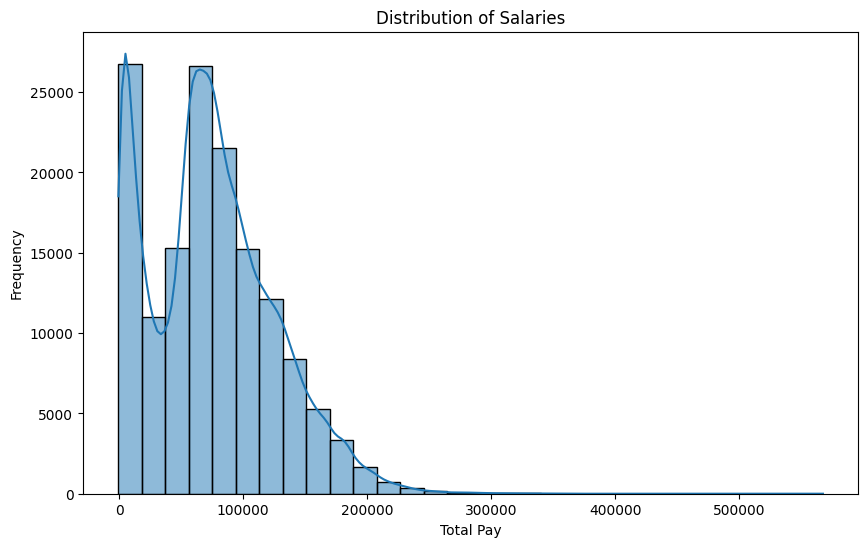

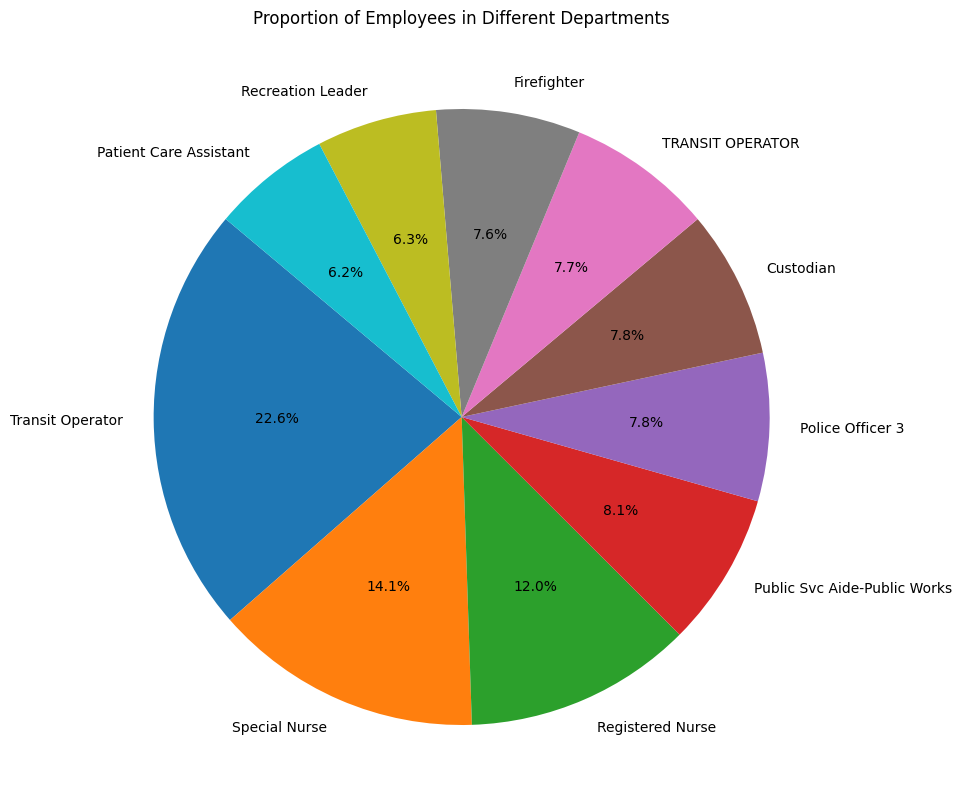

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Use a pie chart to represent the proportion of employees in different departments
department_distribution = df['JobTitle'].value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(department_distribution, labels=department_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()


# **5-Grouped Analysis:**

In [50]:
# Group the data by 'Year' and calculate average salaries for each year
average_salaries_by_year = df.groupby('Year')['TotalPay'].mean()

# Group the data by 'JobTitle' and calculate average salaries for each job title
average_salaries_by_job = df.groupby('JobTitle')['TotalPay'].mean()


# **6-Simple Correlation Analysis:**

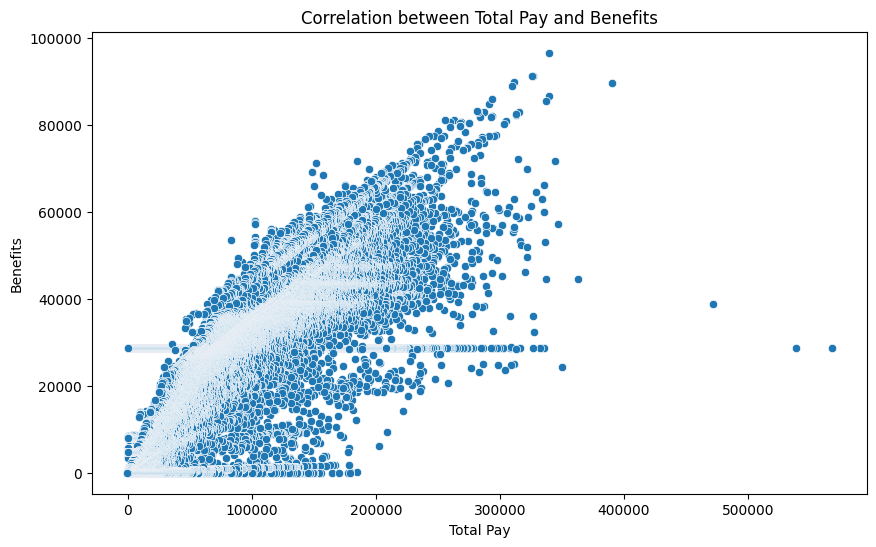


Correlation between Total Pay and Benefits: 0.7735900989526105


In [51]:
# Identify correlation between 'TotalPay' and 'Benefits'
correlation =  df['TotalPay'].corr( df['Benefits'])

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPay', y='Benefits', data= df)
plt.title('Correlation between Total Pay and Benefits')
plt.xlabel('Total Pay')
plt.ylabel('Benefits')
plt.show()

print(f"\nCorrelation between Total Pay and Benefits: {correlation}")


# **7-Summary of Insights:**






1.   The dataset contains information about employees, their job titles, and various aspects of their compensation.

2.   There are no missing values in 'TotalPay', but missing values in 'BasePay' were handled by filling with the mean.

3.  Salaries have a wide range, and the distribution is visualized using histograms.

4.   A pie chart shows the proportion of employees in different departments.



5.  Grouped analysis reveals average salaries by year and job title.

6. A scatter plot and correlation coefficient show the relationship between 'TotalPay' and 'Benefits'.









# Good Luck!